# Predictions on different data quality

## Parameters and model

In [1]:
import sys

sys.path.append('..')
from timeseries.timeseries import StockMarketSeries
from timeseries.utils import SeriesColumn
from predictions.prediction import PredictionModel

company_name = "Apple"
path = "../data/timeseries/apple.csv"
time_series_start = 0
time_series_end = 180
column = SeriesColumn.CLOSE
stock = StockMarketSeries(company_name, path, time_series_start, time_series_end)

## Data - one price column

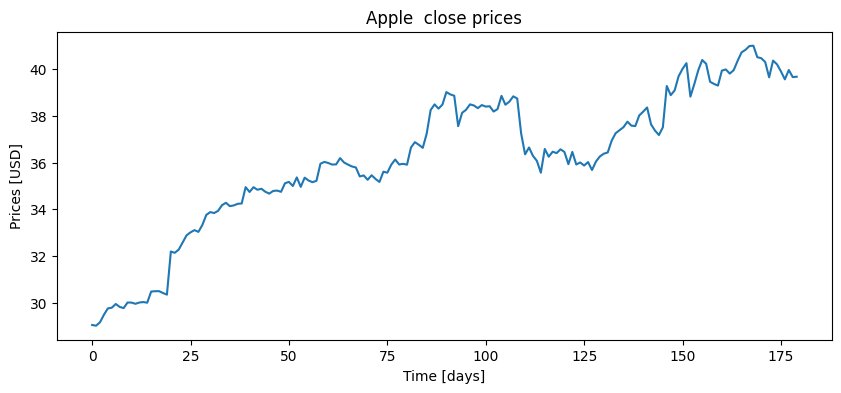

In [2]:
stock.plot_single_series(stock.real_series[column], column)

## Predictions parameters

In [3]:
prediction_start = 160
iterations = 3

model = PredictionModel(stock, prediction_start, column, iterations=iterations)

## Statistical methods

In [4]:
from arima import ManualArima

arima_type = ManualArima

## AR(5)

In [9]:
arima = model.configure_model(arima_type, p=5, q=0)

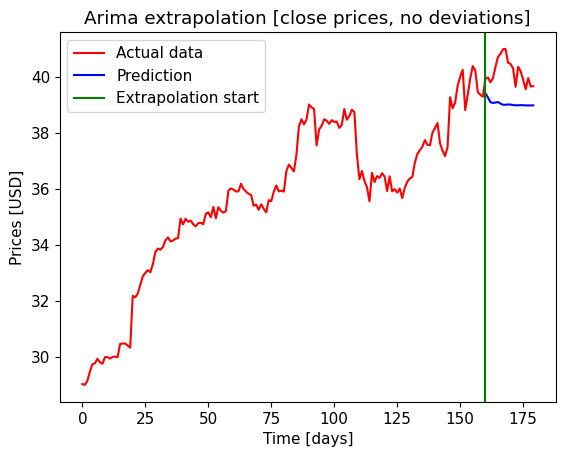

RMS: 1.23 


In [10]:
%%capture --no-stdout --no-display
arima.present_prediction()

In [11]:
%%capture --no-stdout --no-display
arima.compute_statistics_set()

Statistics [Apple stock, close price, 3 iterations]

  Deviations source Deviations scale Avg time [ms] Std dev time Avg RMS  \
0              none             none    790.333333    52.538874    1.23   
1             noise         slightly    660.333333    14.433757   1.273   
2             noise       moderately    675.666667    11.590226    1.47   
3             noise           highly           726          5.0   2.689   
4    incompleteness         slightly           680     6.928203    8.91   
5    incompleteness       moderately           950     6.082763  12.689   
6    incompleteness           highly   1043.333333    28.023799   19.93   
7      obsolescence         slightly           993    50.269275   1.232   
8      obsolescence       moderately   1357.666667    20.647841   0.654   
9      obsolescence           highly   2874.666667   140.507414   4.171   

  Std dev RMS  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
5         0.0  
6        

## ARIMA(5,1,5)

In [12]:
arima = model.configure_model(arima_type, p=5, q=2)

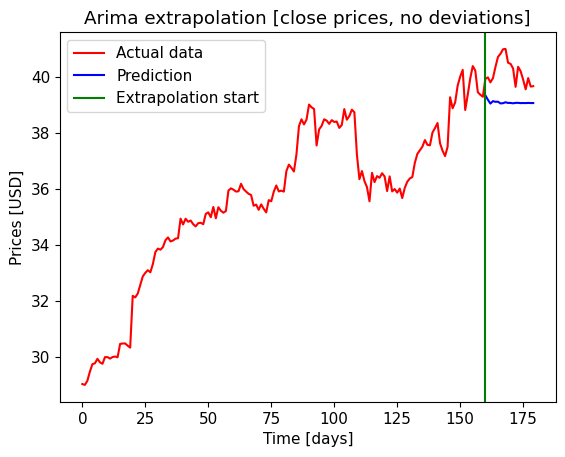

RMS: 1.186 


In [13]:
%%capture --no-stdout --no-display
arima.present_prediction()

In [14]:
%%capture --no-stdout --no-display
arima.compute_statistics_set()

Statistics [Apple stock, close price, 3 iterations]

  Deviations source Deviations scale Avg time [ms] Std dev time Avg RMS  \
0              none             none   1702.333333    75.956128   1.186   
1             noise         slightly   1964.333333    154.42258   1.277   
2             noise       moderately   1561.666667    31.021498   1.463   
3             noise           highly   1908.333333    12.013881   2.703   
4    incompleteness         slightly   2074.666667    15.044379   4.774   
5    incompleteness       moderately   4038.333333    16.862186    12.9   
6    incompleteness           highly          3796    100.68267  20.065   
7      obsolescence         slightly          2293         21.0     1.2   
8      obsolescence       moderately          3369    49.507575   0.682   
9      obsolescence           highly          7344    40.841156   4.084   

  Std dev RMS  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
5         0.0  
6        

## Reservoir computing

In [5]:
from predictions.ml import Reservoir

reservoir = model.configure_model(Reservoir)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: courier
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: courier


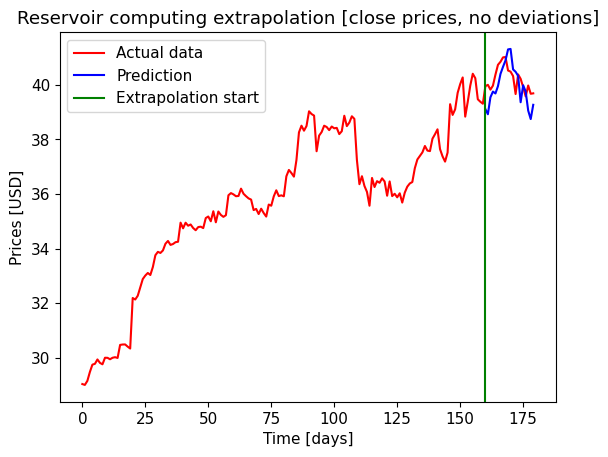

RMS: 0.906 


In [6]:
reservoir.present_prediction()

In [7]:
%%capture --no-stdout --no-display
reservoir.compute_statistics_set()

Statistics [Apple stock, close price, 3 iterations]

  Deviations source Deviations scale Avg time [ms] Std dev time    Avg RMS  \
0              none             none            16          0.0      0.663   
1             noise         slightly            17     1.732051   0.979667   
2             noise       moderately            21     8.660254      1.621   
3             noise           highly            16          6.0   4.369667   
4    incompleteness         slightly            16          0.0      9.328   
5    incompleteness       moderately            16          0.0     17.857   
6    incompleteness           highly     11.666667     7.505553  22.164333   
7      obsolescence         slightly            16          0.0   1.305667   
8      obsolescence       moderately            20     9.165151      1.112   
9      obsolescence           highly     21.333333     9.237604   1.058667   

  Std dev RMS  
0    0.033645  
1    0.215695  
2    0.009849  
3    0.323829  
4    0.1

## XGBoost

In [8]:
from ml import XGBoost

xgboost = model.configure_model(XGBoost, optimize=False)

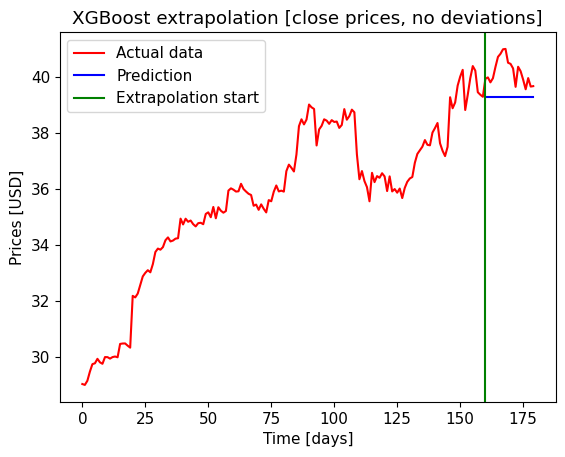

RMS: 1.001 


In [9]:
xgboost.present_prediction()

In [10]:
%%capture --no-stdout --no-display
xgboost.compute_statistics_set()

Statistics [Apple stock, close price, 3 iterations]

  Deviations source Deviations scale Avg time [ms] Std dev time Avg RMS  \
0              none             none            47          0.0   1.001   
1             noise         slightly     59.666667    11.372481   1.249   
2             noise       moderately     56.333333     8.504901   2.989   
3             noise           highly     55.666667    11.846237   3.689   
4    incompleteness         slightly     52.333333     9.237604   8.843   
5    incompleteness       moderately     56.666667    13.428825  17.602   
6    incompleteness           highly     50.333333     8.020806  29.764   
7      obsolescence         slightly            43     6.928203   1.093   
8      obsolescence       moderately     40.333333     7.637626   0.793   
9      obsolescence           highly     36.666667     8.962886   3.863   

  Std dev RMS  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
5         0.0  
6        